In [1]:
suppressWarnings(library(ArchR))
suppressWarnings(library(dplyr))


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
setwd('~/workspace/Mida_collab/')

In [3]:
crfd <- loadArchRProject('CorticalFolding/',showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
prediction <- read.csv('Multi-omics_intergration/output/emb_glue_prediction.csv',row.names = 1,header=TRUE)
head(prediction)

,identity,cluster,dataset,celltype_cellpred
,<chr>,<chr>,<chr>,<chr>
GW11_C_AAACCCAAGCCGATTT-1,Nascent ExN,empty,RNA,Nascent_ExN
GW11_C_AAACCCAAGGTTGTTC-1,vRG,empty,RNA,vRG
GW11_C_AAACCCAAGTGTGTTC-1,vRG,empty,RNA,vRG
GW11_C_AAACCCAGTCCCGTGA-1,IPC2,empty,RNA,IPC2
GW11_C_AAACCCAGTTTGAAAG-1,vRG,empty,RNA,vRG
GW11_C_AAACCCATCACCGGGT-1,Nascent ExN,empty,RNA,Nascent_ExN


In [5]:
crfd@cellColData$celltype <- prediction[crfd@cellColData %>% rownames(),'celltype_cellpred']

In [ ]:
crfd_clean <- subsetArchRProject(ArchRProj = crfd, 
                                cells = rownames(data.frame(crfd@cellColData) %>% filter((!celltype %in% c('Others','Unknown','Others_to_remove')) & (!Clusters %in% c('C3','C4')))),
                                outputDirectory = 'CorticalFolding_Clean/',
                                threads=4)
                                ###remove low-quality celltypes and doublets celltypes

In [7]:
crfd_clean <- loadArchRProject('CorticalFolding_Clean/')

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [8]:
celltype_rgb <- c('vRG' = '#FFED6F','oRG' = '#FF7F00','IPC1' = '#B3DE69','IPC2' = '#FCCDE5','IN' = '#FDB462','Nascent_ExN' = '#FB8072',
             'L6B' = '#6A3D9A','CFuPN' = '#1F78B4','Microglia_OPC' = '#33A02C')

In [9]:
sample_rgb <- c('Sulcus' = '#1e807a', 'Adjacent' = '#f5d731','Distant' = '#d92523')

In [10]:
p1 <- plotEmbedding(ArchRProj = crfd_clean, colorBy = "cellColData", name = "celltype", embedding = "Harmony_UMAP",rastr = TRUE,pal=celltype_rgb)
p1$layers <- p1$layers[1] ###remove layer distractions

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-177f917ffdd0a5-Date-2025-09-24_Time-00-39-33.180874.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the ArchR package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the ArchR package.
  Please report the issue to the authors.”
Warning message:
“`aes_()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`
ℹ The deprecated feature was likely used in the ArchR package.
  Please report the issue to the authors.”


ArchR logging successful to : ArchRLogs/ArchR-plotEmbed

In [11]:
p2 <- plotEmbedding(ArchRProj = crfd_clean, colorBy = "cellColData", name = "Sample", embedding = "Harmony_UMAP",rastr = TRUE,pal=sample_rgb)
p2$layers <- p2$layers[1]

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-177f911f247a7a-Date-2025-09-24_Time-00-39-33.962986.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-177f911f247a7a-Date-2025-09-24_Time-00-39-33.962986.log



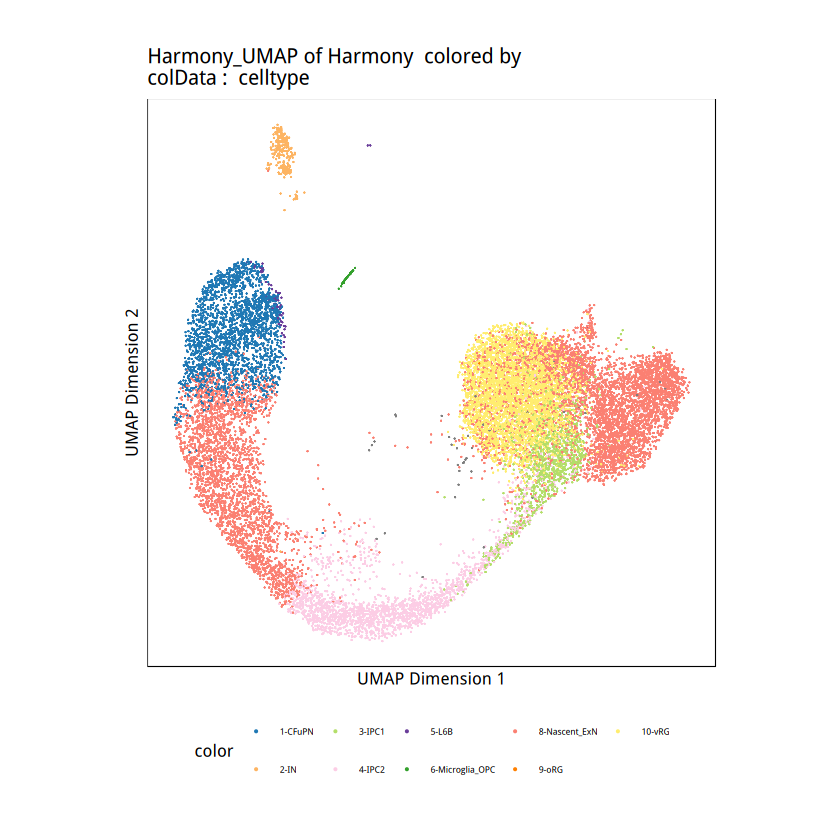

In [12]:
p1

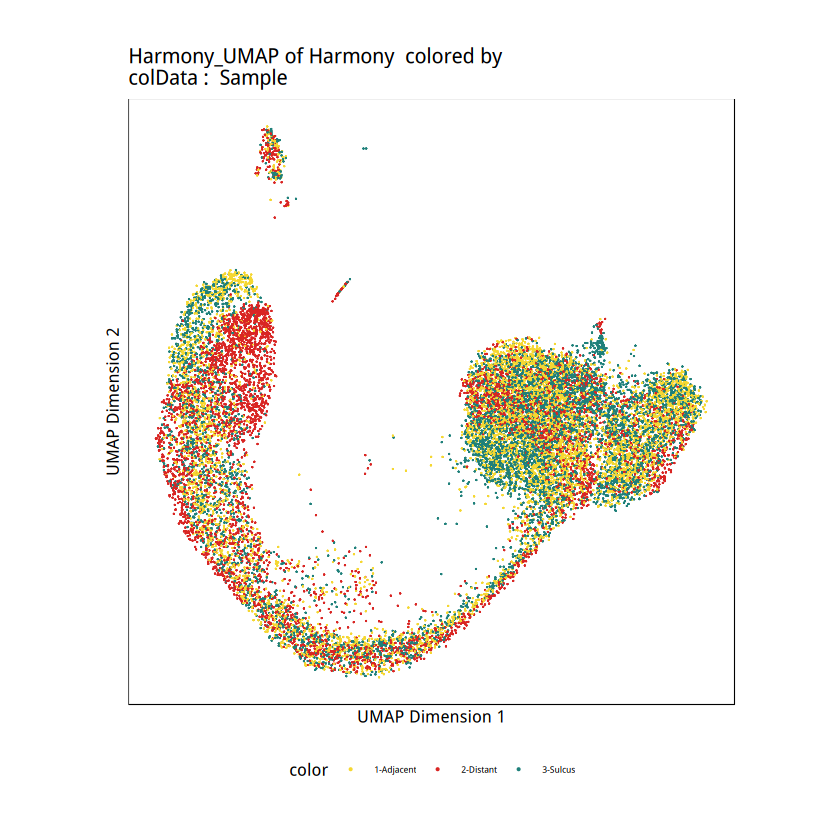

In [13]:
p2

In [ ]:
##plotPDF(p1,p2, name = "Plot-UMAP-Sample-Clusters.pdf", ArchRProj = crfd_clean, addDOC = FALSE, width = 5, height = 5)